<a href="https://colab.research.google.com/github/tomonari-masada/course2024-sml/blob/main/05_nearest_neighbors_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k近傍法（続）
* 今回は、複数の特徴量を使って、k近傍法で予測をおこなう。

## 準備

### インポート

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

### データファイル

* `lifesat_extended.csv`をアップロードする。

In [37]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended (1).csv


{'lifesat_extended (1).csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,

In [38]:
df = pd.read_csv("lifesat_extended.csv", index_col="Country")
df

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


* 日本をテストデータとして除外し、残りのデータ集合を使う。

In [39]:
df_train = df.drop(['Japan'])
df_test = df.loc[['Japan']]

In [40]:
df_train

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5,17288.083
Greece,27.0,3.7,6.5,0.7,68.0,6.16,49.0,1.6,18575.0,14579.0,...,25503.0,83.0,1.2,74.0,466.0,14.91,64.0,69.0,18.6,18064.288
Portugal,18.0,5.7,6.5,0.9,38.0,9.62,61.0,1.1,20086.0,31245.0,...,23688.0,86.0,1.6,46.0,488.0,14.95,58.0,86.0,17.6,19121.592
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4,20732.482


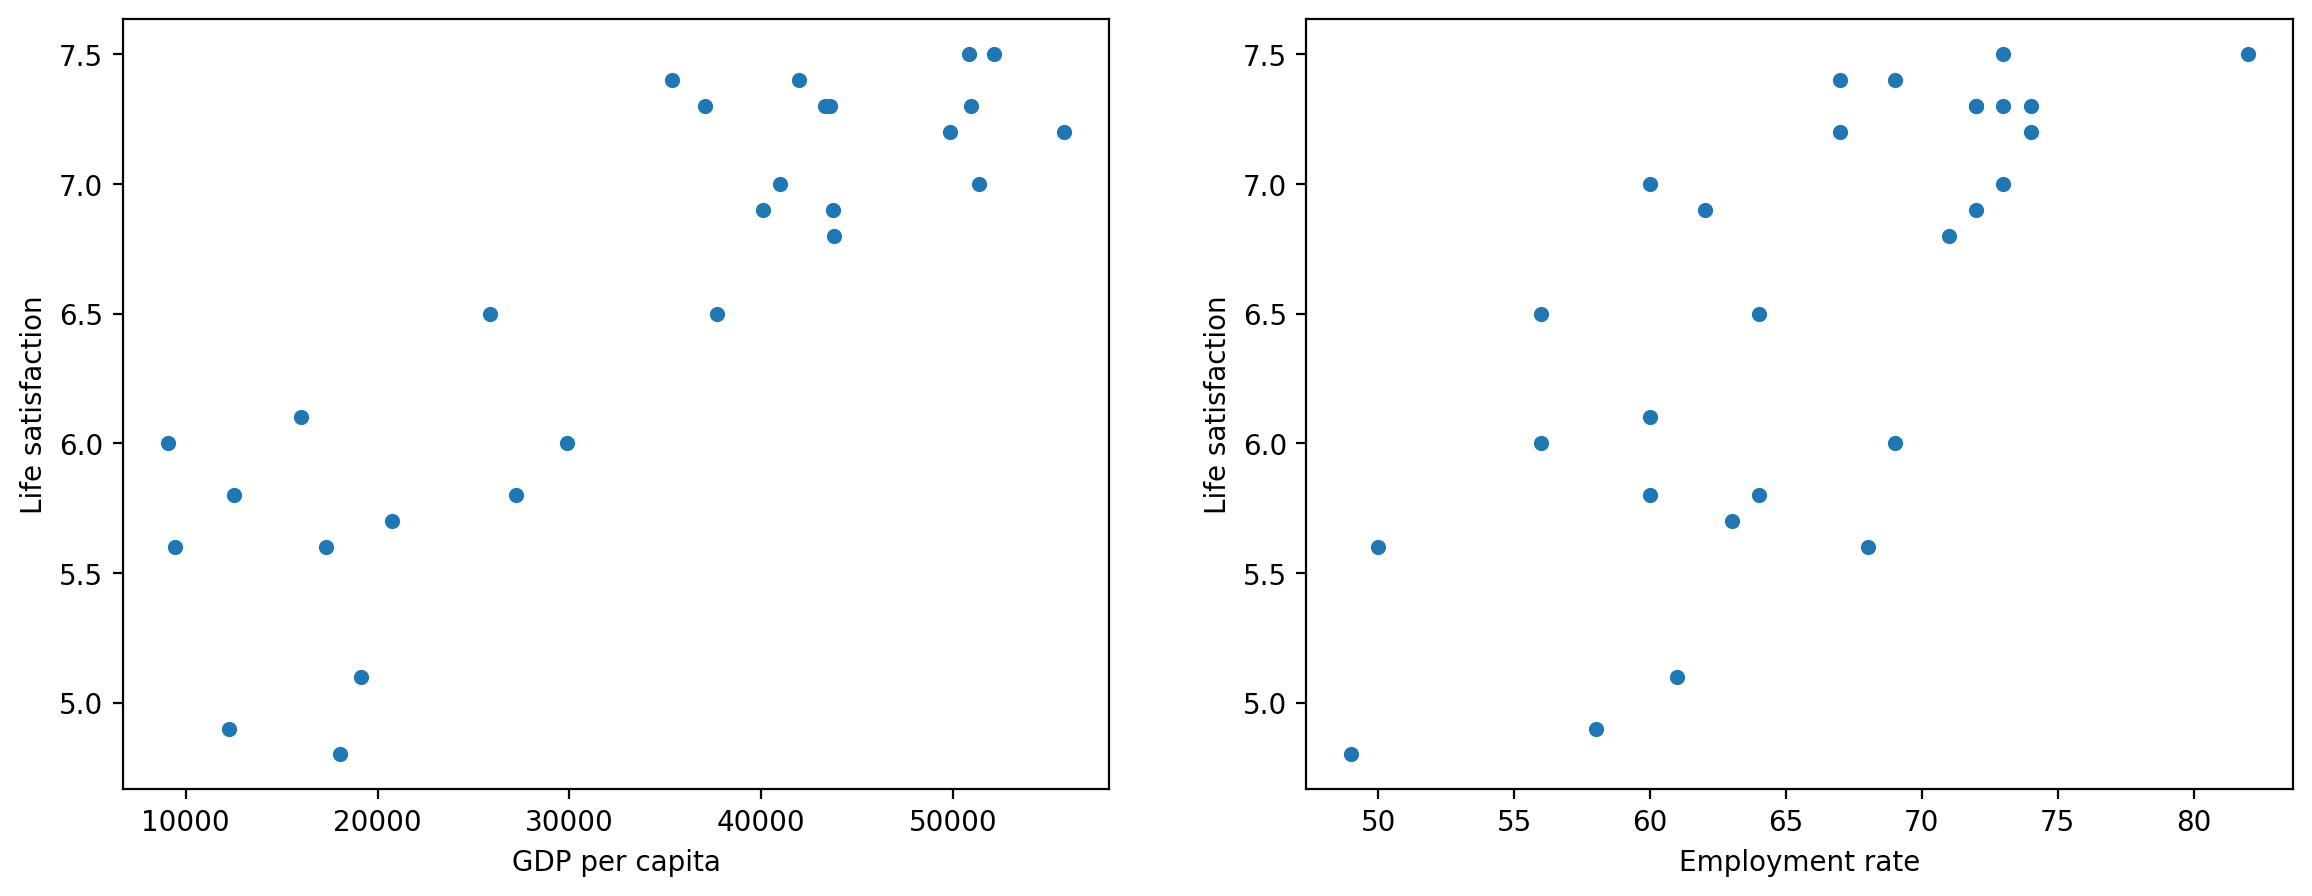

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_train.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax[0])
df_train.plot(kind='scatter', x='Employment rate', y='Life satisfaction', ax=ax[1]);

In [42]:
X = df_train[['GDP per capita', 'Employment rate']]
y = df_train['Life satisfaction']

In [43]:
X

,GDP per capita,Employment rate
Country,,
Russia,9054.914,69.0
Turkey,9437.372,50.0
Hungary,12239.894,58.0
Poland,12495.334,60.0
Slovak Republic,15991.736,60.0
Estonia,17288.083,68.0
Greece,18064.288,49.0
Portugal,19121.592,61.0
Slovenia,20732.482,63.0


## 今回の設定: 複数の特徴量を同時に使う
* 前回は、一人当たりのGDPと、雇用率を、別々に使った。
* 今回は、これら二つの特徴量を、同時に使いたい。
* つまり、(一人当たりのGDP, 雇用率)という2次元ベクトルを使って、生活満足度を予測したい。

### 演習問題1
* 韓国とイタリアの距離を、一人当たりのGDPと雇用率を同時に使って計算したい。
* しかし、下に示す距離の計算方法には、問題がある。どのような問題があるか。

In [44]:
country = 'Korea'
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

In [45]:
X_valid

GDP per capita     27195.197
Employment rate       64.000
Name: Korea, dtype: float64

In [46]:
X_train.loc['Italy'] - X_valid

GDP per capita     2671.384
Employment rate      -8.000
dtype: float64

In [47]:
print(np.linalg.norm(X_train.loc['Italy'] - X_valid))

2671.395978782627


### 演習問題2
* 上で見つけた問題を解決した上で、あらためて、韓国とイタリアの距離を求めてみよう。

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler_example = MinMaxScaler()

X_train_scaled_example = scaler_example.fit_transform(X_train)

In [49]:
country = 'Korea'
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)
X_train_scaled


,GDP per capita,Employment rate
Country,,
Russia,0.000000,0.606061
Turkey,0.008181,0.030303
Hungary,0.068127,0.272727
Poland,0.073591,0.333333
Slovak Republic,0.148380,0.333333
Estonia,0.176109,0.575758
Greece,0.192713,0.000000
Portugal,0.215329,0.363636
Slovenia,0.249786,0.424242


In [50]:
scaler.transform(X_valid.values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.38802504, 0.45454545]])

In [51]:
X_train_scaled - scaler.transform(X_valid.values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,GDP per capita,Employment rate
Country,,
Russia,-0.388025,0.151515
Turkey,-0.379844,-0.424242
Hungary,-0.319898,-0.181818
Poland,-0.314434,-0.121212
Slovak Republic,-0.239645,-0.121212
Estonia,-0.211916,0.121212
Greece,-0.195312,-0.454545
Portugal,-0.172696,-0.090909
Slovenia,-0.138239,-0.030303


In [52]:
(X_train_scaled - scaler.transform(X_valid.values.reshape(1,-1))).loc['Italy']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


GDP per capita     0.057142
Employment rate   -0.242424
Name: Italy, dtype: float64

In [53]:
print(np.linalg.norm((X_train_scaled - scaler.transform(X_valid.values.reshape(1,-1))).loc['Italy']))

0.2490676012036836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


StandardScale方法で計算する

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)


In [55]:
X_train_scaled #Normalize

,GDP per capita,Employment rate
Country,,
Russia,-1.654574,0.416021
Turkey,-1.628850,-2.009192
Hungary,-1.440354,-0.988050
Poland,-1.423173,-0.732764
Slovak Republic,-1.188007,-0.732764
Estonia,-1.100816,0.288378
Greece,-1.048609,-2.136835
Portugal,-0.977495,-0.605121
Slovenia,-0.869148,-0.349836


In [56]:
X_train_scaled[X_train.columns].loc['Italy']

GDP per capita    -0.254794
Employment rate   -1.243336
Name: Italy, dtype: float64

In [57]:
scaler.transform(X_valid.values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.43446971, -0.22219304]])

In [58]:
(X_train_scaled - scaler.transform(X_valid.values.reshape(1,-1))).loc['Italy']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


GDP per capita     0.179676
Employment rate   -1.021142
Name: Italy, dtype: float64

In [59]:
print(np.linalg.norm((X_train_scaled - scaler.transform(X_valid.values.reshape(1,-1))).loc['Greece']))

2.010726598916413


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 訓練データ/検証データ/テストデータ


### テストデータ (test set)
* 最終的にそれについて予測を行なうことで、手法の評価をおこないたいデータを、テストデータと呼ぶ。
* よって、今回は、日本のデータが、テストデータになる。
 * 普通は、テストデータは今回のように一つだけではなく、複数、用意する。
 * 今回は、データ数そのものが29個と少ないため、テストデータは一つだけにしている。

### 検証データ (validation set)

* 最適な近傍の個数kを、どうやって求めたらいいだろうか。
* kの値を変えながら、日本の生活満足度を予測しつつ・・・
* その日本の予測誤差を見ながらkを決めるのでは、カンニングしていることになる。
 * テストデータでの評価は、最終評価なので、最後に一度行うだけ。
 * つまり、テストデータについては、答えが分かっていないと想定する。
* 日本の生活満足度を予測する前に、どのようにしてkを決めればいいだろうか。


* そこで、テストデータ以外のデータを使って、予測問題を解き、評価する。

* テストデータ以外のデータの中から、国を一つ選んで（例えば韓国）、その国について予測をしてみる。
* k近傍法の場合のkのように、チューニングしなければならないハイパーパラメータを決めるために使うデータを、検証データと呼ぶ。
 * 本当にそれについて予測をしたいデータは、テストデータ。
 * 検証(validation)のためにそれについて予測をおこなうデータが、検証データ。
* 検証データについて予測を行うことで、kの値を変えたとき予測性能がどう変わるか、調べる。
 * 検証データも、普通は、複数個用意する。
 * 今回は、データ数そのものが少ないため、検証データも一つだけにしている。


### 訓練データ (training set)
* 予測を実行するための手掛かりとする使うデータ集合を、訓練データと呼ぶ。
* k近傍法では、その中から特定の国の近傍をk個見つけてくるデータ集合が、訓練データになる。

## 最適なkの決定
* ここでは、韓国を検証データとして使う。
 * 日本はテストデータなので、最初に除外しておいた。
* そして、韓国の生活満足度を予測し、最も良い予測値を与えるkがいくらか、調べる。

### 演習問題3
* 韓国の生活満足度を予測し、最も良い予測値を与えるkを調べよう。

In [163]:
from sklearn.preprocessing import MinMaxScaler

country = 'Korea'
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)
X_train_scaled

#following two-lines are equal to scaler.fit_transform(X_train)
#scaler.fit(X_train)
#X_train_scaled[X_train.columns] = scaler.transform(X_train)

,GDP per capita,Employment rate
Country,,
Russia,0.000000,0.606061
Turkey,0.008181,0.030303
Hungary,0.068127,0.272727
Poland,0.073591,0.333333
Slovak Republic,0.148380,0.333333
Estonia,0.176109,0.575758
Greece,0.192713,0.000000
Portugal,0.215329,0.363636
Slovenia,0.249786,0.424242


In [164]:
X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
#scaler.transform([X_valid]) equal to the line before, and do not use scaler.fit_transform([X_valid])
X_valid_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.38802504, 0.45454545]])

In [165]:
X_distance = X_train_scaled - X_valid_scaled
X_distance

,GDP per capita,Employment rate
Country,,
Russia,-0.388025,0.151515
Turkey,-0.379844,-0.424242
Hungary,-0.319898,-0.181818
Poland,-0.314434,-0.121212
Slovak Republic,-0.239645,-0.121212
Estonia,-0.211916,0.121212
Greece,-0.195312,-0.454545
Portugal,-0.172696,-0.090909
Slovenia,-0.138239,-0.030303


In [166]:
print(np.linalg.norm((X_train_scaled - X_valid_scaled).loc['Denmark']))

0.5987431954811533


In [167]:
distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
X_distance.loc[:,'Distance'] = distance
X_distance

,GDP per capita,Employment rate,Distance
Country,,,
Russia,-0.388025,0.151515,0.416558
Turkey,-0.379844,-0.424242,0.569441
Hungary,-0.319898,-0.181818,0.367957
Poland,-0.314434,-0.121212,0.336988
Slovak Republic,-0.239645,-0.121212,0.268555
Estonia,-0.211916,0.121212,0.244132
Greece,-0.195312,-0.454545,0.494731
Portugal,-0.172696,-0.090909,0.195163
Slovenia,-0.138239,-0.030303,0.141521


In [186]:
k = 5
feature = X_distance.columns[2]
indices = X_distance[feature].sort_values().index[:k]
indices

Index(['Slovenia', 'Portugal', 'Israel', 'France', 'Spain'], dtype='object', name='Country')

In [187]:
y_train[indices]

Country
Slovenia    5.7
Portugal    5.1
Israel      7.4
France      6.5
Spain       6.5
Name: Life satisfaction, dtype: float64

In [188]:
y_train[indices].mean()

6.24

In [189]:
y_valid

5.8

In [190]:
k = 1
feature = X_distance.columns[2]
indices = X_distance[feature].sort_values().index[:k]
y_train[indices].mean()
prediction = y_train[indices].mean()
np.abs(prediction - y_valid)

#K=1,予測値は最も良い

0.09999999999999964

韓国の場合は、K=1予測値は最も良い

## 交差検証 (cross-validation)
* 検証データの取り方を何通りも変えつつ予測手法の評価を繰り返すことで・・・
* 手法の性能を検証することを交差検証と呼ぶ。

## leave-one-out交差検証 (1)
* 上では、韓国を検証データとして使った。
* しかし、韓国以外の国を検証データとしても構わないはずである。
* そこで、日本以外の国の一つ一つを検証データとした場合の、それぞれ最適なkの値を求めてみる。
  * 検証データが1個の場合の交差検証を、leave-one-out交差検証と呼ぶ。

### 演習問題4
* 韓国について行ったことと同じことを、他の国についても実行し・・・
* 最適なkの値がどのくらい違ってくるか、調べてみよう。

例えば、スペインの場合

In [178]:
#Forexample Spain
from sklearn.preprocessing import MinMaxScaler

country = 'Spain'
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
X_distance = X_train_scaled - X_valid_scaled
distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
X_distance.loc[:,'Distance'] = distance
X_distance

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,GDP per capita,Employment rate,Distance
Country,,,
Russia,-0.359566,0.393939,0.533363
Turkey,-0.351385,-0.181818,0.395638
Hungary,-0.291438,0.060606,0.297673
Poland,-0.285974,0.121212,0.310602
Slovak Republic,-0.211186,0.121212,0.243499
Estonia,-0.183456,0.363636,0.407293
Greece,-0.166853,-0.212121,0.269880
Portugal,-0.144237,0.151515,0.209192
Slovenia,-0.109780,0.212121,0.238845


In [181]:
y_train[indices].mean()

6.514814814814814

In [180]:
y_valid

6.5

In [183]:
k = 27
feature = X_distance.columns[2]
indices = X_distance[feature].sort_values().index[:k]
y_train[indices].mean()
prediction = y_train[indices].mean()
np.abs(prediction - y_valid)

#K=27,予測値は最も良い

0.01481481481481417

スペインの場合は、K=27予測値は最も良い

* 最適なkを、どのようにして決めればいいだろうか？
 * 例えば、各国について得られたkの平均をとることが考えられるが、これは良い方法と言えるだろうか？

## leave-one-out交差検証 (2)
* 上では、テストデータである日本を除く国を、一つずつ順番に検証データとして、最適なkを求めた。
* しかし、こうして国ごとに求められたkを、どうやってまとめあげるのか、疑問が残った。
 * それらkの平均をとる、という方法は、何かおかしい感じがする。
 * 最頻値の方が、まだましであろう。
* 最適なkを決める、もっと良い方法はないだろうか？

### 演習問題5
* 韓国を検証データとする。つまり、韓国について予測を行なう。k=1から27まで変えたとき、それぞれ予測誤差がいくらになるか、求めてみよう。

In [194]:
from sklearn.preprocessing import MinMaxScaler

country = 'Korea' #韓国を検証データとする
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
X_distance = X_train_scaled - X_valid_scaled
distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
X_distance.loc[:,'Distance'] = distance

for k in range(28):
 feature = X_distance.columns[2]
 indices = X_distance[feature].sort_values().index[:k]
 y_train[indices].mean()
 prediction = y_train[indices].mean()
 error = np.abs(prediction - y_valid)
 print(k,error)

0 nan
1 0.09999999999999964
2 0.39999999999999947
3 0.2666666666666675
4 0.3750000000000009
5 0.4400000000000004
6 0.3333333333333339
7 0.31428571428571495
8 0.3125000000000009
9 0.40000000000000036
10 0.3600000000000003
11 0.46363636363636473
12 0.5583333333333345
13 0.44615384615384723
14 0.5000000000000018
15 0.5333333333333341
16 0.5125000000000002
17 0.5705882352941174
18 0.6000000000000005
19 0.647368421052632
20 0.5650000000000004
21 0.5952380952380958
22 0.6363636363636376
23 0.6000000000000005
24 0.6333333333333337
25 0.6760000000000002
26 0.703846153846154
27 0.7407407407407405


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### 演習問題6
* 縦が国名、横がkの値の表を、データフレームとして作った上で・・・
* 日本を除く28カ国の一つ一つを検証データとして評価していくことで・・・
* 各々のkの値で予測誤差がいくらになるかで、表を埋めてみよう。

In [197]:
from sklearn.preprocessing import MinMaxScaler

country = 'Russia'
X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
X_distance = X_train_scaled - X_valid_scaled
distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
X_distance.loc[:,'Distance'] = distance

for k in range(28):
 feature = X_distance.columns[2]
 indices = X_distance[feature].sort_values().index[:k]
 y_train[indices].mean()
 prediction = y_train[indices].mean()
 error = np.abs(prediction - y_valid)
 print(error)

nan
0.40000000000000036
0.3000000000000007
0.3000000000000007
0.20000000000000107
0.34000000000000075
0.4666666666666677
0.4285714285714297
0.3125
0.12222222222222268
0.15000000000000036
0.1363636363636367
0.016666666666666607
0.023076923076922995
0.06428571428571495
0.0066666666666659324
0.0625
0.14117647058823568
0.2055555555555557
0.23684210526315752
0.27000000000000046
0.3190476190476197
0.35909090909090935
0.40000000000000036
0.44583333333333286
0.46799999999999997
0.5076923076923077
0.5333333333333323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [232]:
X_list=[]
X_df = pd.DataFrame(X_list,
        columns = ['K=1','K=2','K=3','K=4','K=5','K=6','K=7','K=8','K=9','K=10','K=11','K=12','K=13','K=14','K=15','K=16','K=17','K=18','K=19','K=20','K=21','K=22','K=23','K=24','K=25','K=26','K=27','K=28'],
        index = X.index)

In [233]:
for i in range(29):
  country = X.index[i-1]
  X_train = X.drop([country])
  X_valid = X.loc[country]
  y_train = y.drop([country])
  y_valid = y.loc[country]

  scaler = MinMaxScaler()
  X_train_scaled = X_train.copy()
  X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

  X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
  X_distance = X_train_scaled - X_valid_scaled
  distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
  X_distance.loc[:,'Distance'] = distance

  for k in range(29):
   feature = X_distance.columns[2]
   indices = X_distance[feature].sort_values().index[:k]
   y_train[indices].mean()
   prediction = y_train[indices].mean()
   error = np.abs(prediction - y_valid)
   X_df.iat[i-1,k-1] = error.round(3)
X_df


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

,K=1,K=2,K=3,K=4,K=5,K=6,K=7,K=8,K=9,K=10,...,K=19,K=20,K=21,K=22,K=23,K=24,K=25,K=26,K=27,K=28
Country,,,,,,,,,,,,,,,,,,,,,
Russia,0.4,0.3,0.3,0.2,0.34,0.467,0.429,0.312,0.122,0.15,...,0.237,0.27,0.319,0.359,0.4,0.446,0.468,0.508,0.533,0.533
Turkey,0.8,0.75,0.433,0.2,0.26,0.067,0.043,0.012,0.033,0.03,...,0.642,0.695,0.724,0.768,0.809,0.842,0.872,0.912,0.948,0.948
Hungary,0.9,1.05,0.767,0.775,0.76,0.9,0.757,0.75,0.789,0.8,...,1.395,1.425,1.471,1.5,1.539,1.571,1.612,1.638,1.674,1.674
Poland,0.9,0.3,0.433,0.35,0.32,0.233,0.229,0.112,0.1,0.19,...,0.447,0.48,0.529,0.559,0.6,0.633,0.676,0.704,0.741,0.741
Slovak Republic,1.0,0.65,0.833,0.725,0.5,0.5,0.471,0.425,0.389,0.4,...,0.132,0.165,0.214,0.245,0.287,0.321,0.364,0.392,0.43,0.43
Estonia,0.1,0.25,0.0,0.125,0.14,0.15,0.029,0.25,0.322,0.46,...,0.658,0.69,0.738,0.777,0.817,0.862,0.884,0.912,0.948,0.948
Greece,0.8,1.25,0.867,0.95,1.02,1.017,0.914,0.913,0.922,0.91,...,1.484,1.535,1.562,1.605,1.639,1.675,1.704,1.742,1.778,1.778
Portugal,0.6,0.8,0.767,0.525,0.56,0.7,0.671,0.7,0.722,0.62,...,1.184,1.215,1.262,1.291,1.33,1.362,1.404,1.431,1.467,1.467
Slovenia,0.6,0.1,0.033,0.05,0.02,0.15,0.014,0.025,0.056,0.22,...,0.553,0.585,0.633,0.664,0.704,0.737,0.78,0.808,0.844,0.844


### 演習問題7
* 上で作った表で、それぞれのkの値について、予測誤差の平均値を求めてみよう。

In [240]:
X_df.loc['Average'] = X_df.mean(axis = 0)
X_df

,K=1,K=2,K=3,K=4,K=5,K=6,K=7,K=8,K=9,K=10,...,K=19,K=20,K=21,K=22,K=23,K=24,K=25,K=26,K=27,K=28
Country,,,,,,,,,,,,,,,,,,,,,
Russia,0.4,0.3,0.3,0.2,0.34,0.467,0.429,0.312,0.122,0.15,...,0.237,0.27,0.319,0.359,0.4,0.446,0.468,0.508,0.533,0.533
Turkey,0.8,0.75,0.433,0.2,0.26,0.067,0.043,0.012,0.033,0.03,...,0.642,0.695,0.724,0.768,0.809,0.842,0.872,0.912,0.948,0.948
Hungary,0.9,1.05,0.767,0.775,0.76,0.9,0.757,0.75,0.789,0.8,...,1.395,1.425,1.471,1.5,1.539,1.571,1.612,1.638,1.674,1.674
Poland,0.9,0.3,0.433,0.35,0.32,0.233,0.229,0.112,0.1,0.19,...,0.447,0.48,0.529,0.559,0.6,0.633,0.676,0.704,0.741,0.741
Slovak Republic,1.0,0.65,0.833,0.725,0.5,0.5,0.471,0.425,0.389,0.4,...,0.132,0.165,0.214,0.245,0.287,0.321,0.364,0.392,0.43,0.43
Estonia,0.1,0.25,0.0,0.125,0.14,0.15,0.029,0.25,0.322,0.46,...,0.658,0.69,0.738,0.777,0.817,0.862,0.884,0.912,0.948,0.948
Greece,0.8,1.25,0.867,0.95,1.02,1.017,0.914,0.913,0.922,0.91,...,1.484,1.535,1.562,1.605,1.639,1.675,1.704,1.742,1.778,1.778
Portugal,0.6,0.8,0.767,0.525,0.56,0.7,0.671,0.7,0.722,0.62,...,1.184,1.215,1.262,1.291,1.33,1.362,1.404,1.431,1.467,1.467
Slovenia,0.6,0.1,0.033,0.05,0.02,0.15,0.014,0.025,0.056,0.22,...,0.553,0.585,0.633,0.664,0.704,0.737,0.78,0.808,0.844,0.844


### 演習問題8
* 上で求めた予測誤差の平均値を、最も小さくするkの値は？

In [247]:
X_df.loc['Average'].sort_values().index[0]

'K=10'

最も小さくするKの値=10

### 演習問題9
* こうして求めた最適なkを使って、最終的に、日本の生活満足度の予測をしてみよう。
  * ここで初めてテストデータを使う。

In [271]:
from sklearn.preprocessing import MinMaxScaler

df2_train = pd.read_csv("lifesat_extended.csv", index_col="Country")

X = df2_train[['GDP per capita', 'Employment rate']]
y = df2_train['Life satisfaction']
country = 'Japan'

X_train = X.drop([country])
X_valid = X.loc[country]
y_train = y.drop([country])
y_valid = y.loc[country]
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid.values.reshape(1,-1))
X_distance = X_train_scaled - X_valid_scaled
distance = np.linalg.norm(X_train_scaled - X_valid_scaled,axis = 1)
X_distance.loc[:,'Distance'] = distance

k = 10
feature = X_distance.columns[2]
indices = X_distance[feature].sort_values().index[:k]
indices

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Index(['New Zealand', 'Israel', 'Germany', 'Finland', 'Canada', 'Austria',
       'United Kingdom', 'Netherlands', 'France', 'Korea'],
      dtype='object', name='Country')

本当の日本生活満足度

In [273]:
y_valid

5.9

K=10の場合、予測値

In [277]:
y_train[indices].mean()
prediction = y_train[indices].mean()
prediction

6.970000000000001

# 課題
* 上のnotebookを最後まで実践することが、今回の課題です。